1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [2]:
import numpy as np
a = np.random.rand(30).reshape(10, 3)
i=0
print(a)
while i<10: 
    c = np.argmin(np.abs(a[i] - 0.5))
    print (a[i][c])
    i=i+1

[[0.88139642 0.53190836 0.46013147]
 [0.80599915 0.43467796 0.39974205]
 [0.53153605 0.30045397 0.44157264]
 [0.9803583  0.15896936 0.34651638]
 [0.18729195 0.20962526 0.30483732]
 [0.76850505 0.08812229 0.71332813]
 [0.172972   0.72211722 0.98086422]
 [0.31622091 0.07972494 0.85284726]
 [0.55326813 0.81120012 0.28747376]
 [0.58295308 0.34798159 0.24020392]]
0.5319083612935088
0.4346779553976029
0.5315360481180712
0.34651637810216473
0.30483731906434375
0.7133281288351209
0.7221172198369211
0.31622091003666175
0.5532681272301555
0.582953084014337


2. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [3]:
import numpy as np
a = np.random.rand(36).reshape(6, 6)
print(a)
print(np.sum(a,1)/np.min(a,0))

[[0.75531748 0.27612286 0.652481   0.47597448 0.57577982 0.17435813]
 [0.31854443 0.21952594 0.06951531 0.02940771 0.42762882 0.29759014]
 [0.94520814 0.89146131 0.19256277 0.05617791 0.59228019 0.65328591]
 [0.40087543 0.56573634 0.75668482 0.85929888 0.28774695 0.1058523 ]
 [0.23139315 0.50083075 0.89273797 0.27705398 0.67919229 0.13843517]
 [0.99003841 0.10869398 0.15368542 0.93017595 0.47948439 0.24693071]]
[ 12.57614483  12.53254645  47.91715988 101.20456136   9.45151041
  27.48177213]


3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [4]:
import numpy as np
a = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
zero = a == 0
print (a[1:][zero[:-1]].max())

5


4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [5]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x + np.bincount(i, minlength = len(x)));

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [6]:
import numpy as np

def k_means(x, k, t = 1000, eps = 1e-05):
    n = x.shape[0]
    d = x.shape[1] 
    ncent = x[:k,:] #centroids
    cent = np.zeros((k,d))
    ndist = n * d * k * np.max(x) ** 2 
    dist = 0
    x = np.expand_dims(x, axis = 1) # dim (x) = n*1*d
    i = 0
    while np.abs(ndist - dist) > eps and i < t:
        cent = ncent
        dist = ndist
        clust = np.argmin(((x - ncent) ** 2).sum(axis = 2), axis = 1) # dim (x-ncent) = n*k*d
        M = np.zeros(n * k * d).reshape(n, k, d)
        M[np.arange(n), clust] = (x - ncent)[np.arange(n),clust] / np.bincount(clust)[clust].reshape(n, 1)
        ncent = cent + M.sum(axis = 0)
        clust = np.argmin(((x - ncent) ** 2).sum(axis = 2),axis = 1) #clust[i] = klaster's number for x[i]
        M = np.zeros(n * k * d).reshape(n, k, d)
        M[np.arange(n), clust] = (x - ncent)[np.arange(n), clust]
        ndist = np.sqrt((M ** 2).sum(axis = 2)).sum(axis = 1).mean()
        i = i + 1
    return ncent, ndist

6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

(array([[ 34.51470588,   0.41176471,  38.02941176,  32.11764706,
         50.29411765],
       [102.5       ,   0.44117647,  41.95588235,  61.35294118,
         48.86764706],
       [168.484375  ,   0.46875   ,  36.421875  ,  89.9375    ,
         51.515625  ]]), 34.6832499637399)
(array([[166.5       ,   0.45588235,  36.04411765,  88.91176471,
         50.20588235],
       [ 96.98591549,   0.46478873,  43.1971831 ,  59.35211268,
         50.5915493 ],
       [ 31.01639344,   0.39344262,  36.91803279,  30.36065574,
         49.73770492]]), 34.64693380163856)


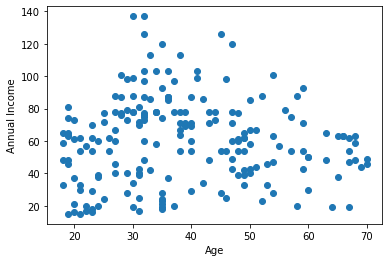

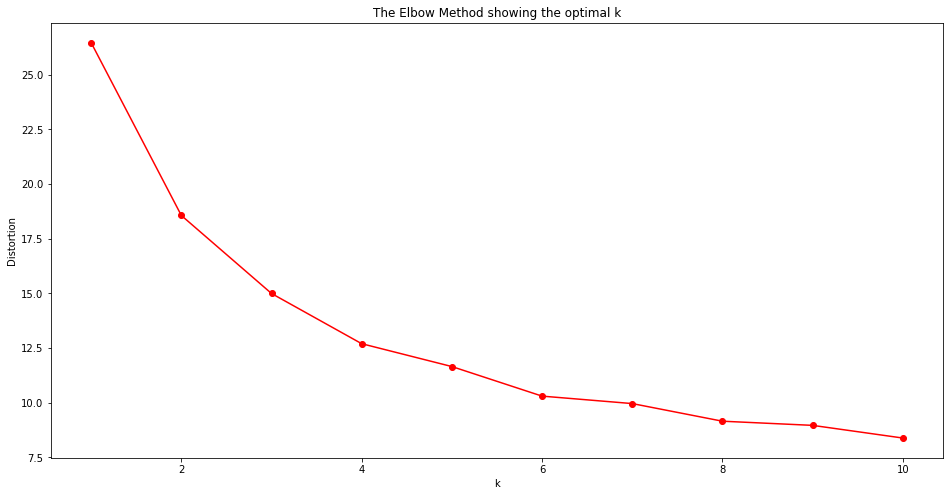

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

#проверка (все верно)

print(k_means(data,3))
print(kmeans(data,3)) 


#Age-Annual Income

plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[2,3]], k)[1])

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 3


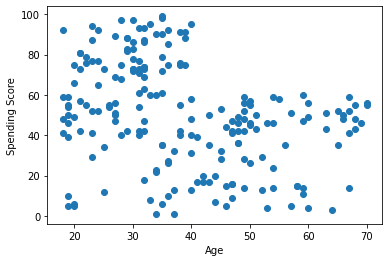

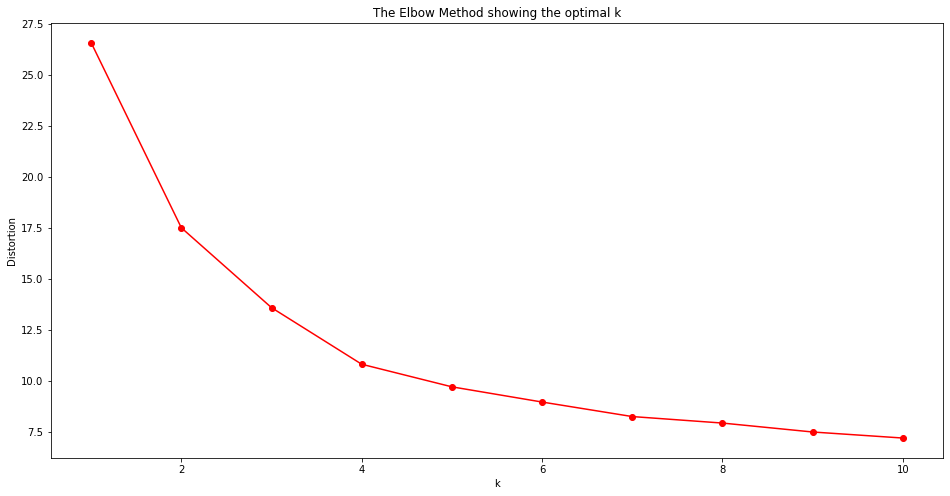

In [8]:
#Age-Spending Score

plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[2,4]], k)[1])
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 4

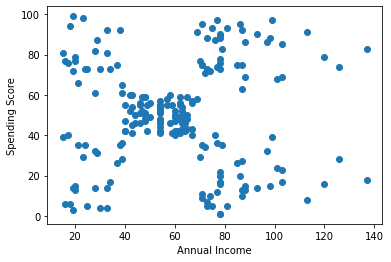

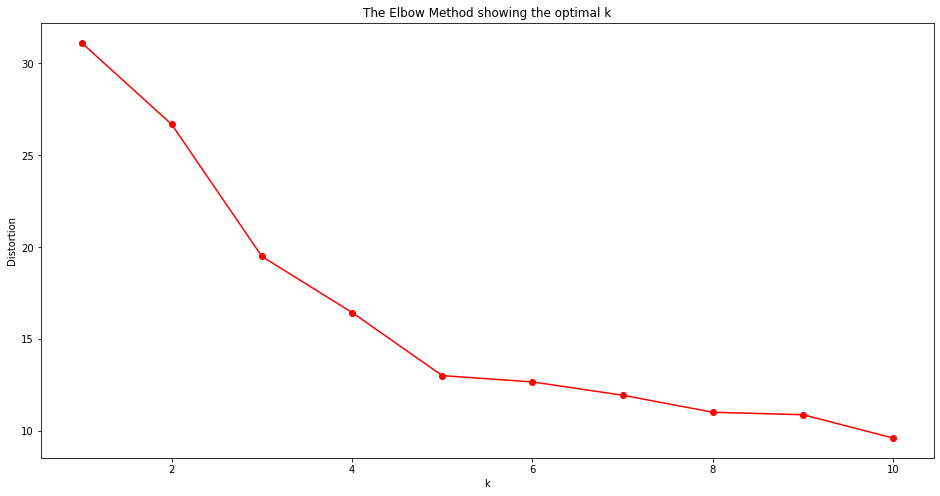

In [9]:
#Annual Income-Spending Score

plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[3,4]], k)[1])
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 5